In [154]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('train.csv')
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Viral')))

df = df.reindex(columns=cols)

X = df.iloc[:, 2:].values
Y = df.iloc[:, 0].values

X_std= StandardScaler().fit_transform(X)
pca= PCA(n_components=5)
X_pca =pca.fit_transform(X_std)

Text(0.5, 0, '2nd principle feature')

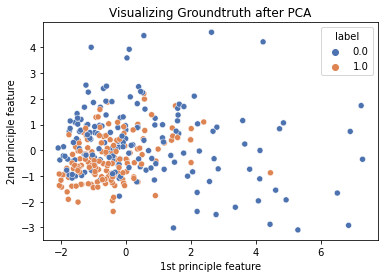

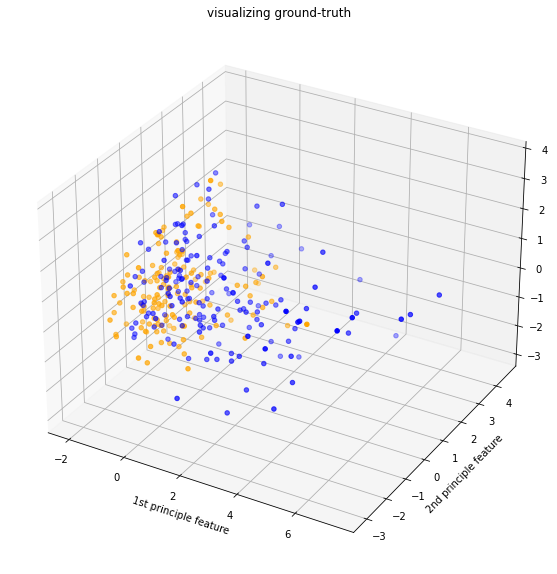

In [175]:
#visualize ground-truth after PCA 


import seaborn as sns
data=X_pca
label=df["Viral"].to_numpy()

#2-d
df1=pd.DataFrame(data)
df1["label"]=df["Viral"]
sns.scatterplot(data=df1, x=0, y=1, hue="label", palette="deep").set(title='Visualizing Groundtruth after PCA')
plt.xlabel("1st principle feature")
plt.ylabel("2nd principle feature")

#3-d
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

filtered_label0 = df1.loc[df1["label"] == 0]
filtered_label1 = df1.loc[df1["label"] == 1]

ax.scatter(filtered_label0.loc[:,0] , filtered_label0.loc[:,1] , filtered_label0.loc[:,2], color = 'blue', label = "non-viral")
ax.scatter(filtered_label1.loc[:,0] , filtered_label1.loc[:,1] , filtered_label1.loc[:,2], color = 'orange', label = "viral")

plt.title("visualizing ground-truth")
plt.xlabel("1st principle feature")
plt.ylabel("2nd principle feature")

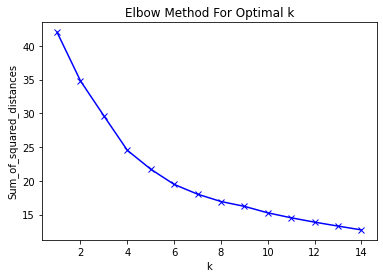

In [137]:
#find optimal cluster number
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [176]:
#kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(data).predict(data)
#print(kmeans.shape)
df["k-means cluster"]=kmeans
print("done")

done


Text(0.5, 0, '2nd principle feature')

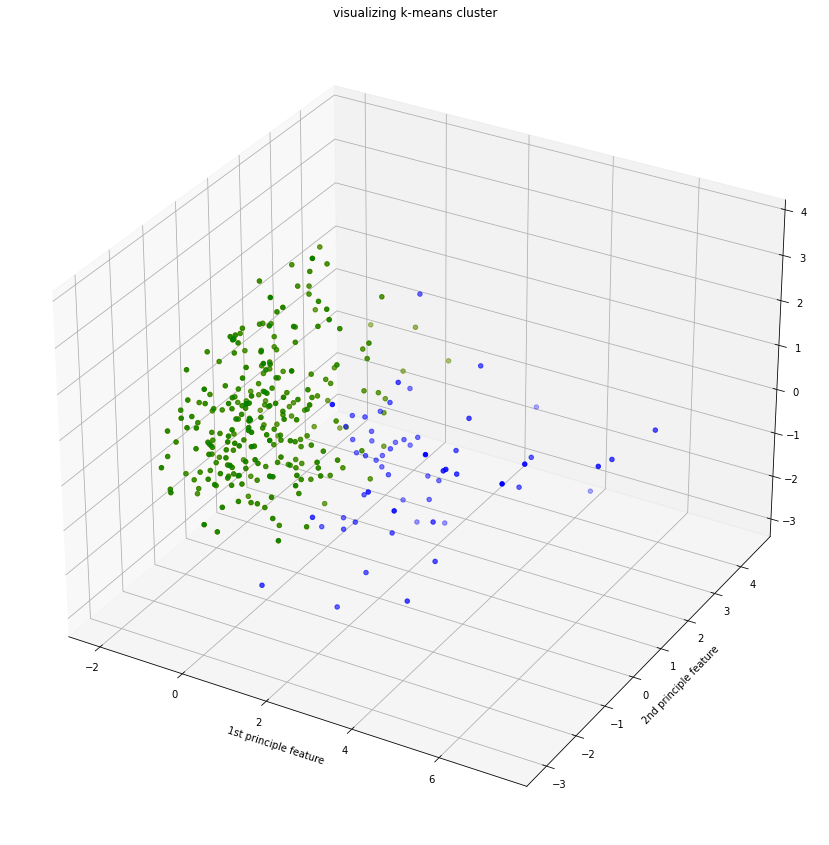

In [177]:
#visualize data 3-D
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

filtered_label0 = data[kmeans == 0]
filtered_label1 = data[kmeans == 1]
filtered_label2 = data[kmeans == 2]

ax.scatter(filtered_label0[:,0] , filtered_label0[:,1] , filtered_label0[:,2],color = 'blue', label = "cluster 0")
ax.scatter(filtered_label1[:,0] , filtered_label1[:,1] , filtered_label1[:,2], color = 'orange', label = "cluster 1")
ax.scatter(filtered_label1[:,0] , filtered_label1[:,1] , filtered_label1[:,2], color = 'green', label = "cluster 2")

plt.title("visualizing k-means cluster")
plt.xlabel("1st principle feature")
plt.ylabel("2nd principle feature")

Text(0.5, 1.0, 'visualizing k-means cluster')

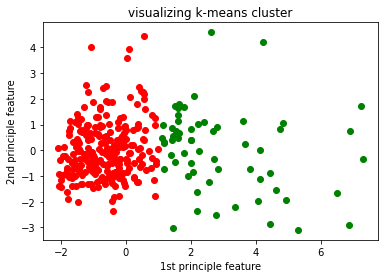

In [178]:
#visualize data 2-D
import matplotlib.pyplot as plt

filtered_label0 = data[kmeans == 0]
filtered_label1 = data[kmeans == 1]

#1
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1],color='green')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.xlabel("1st principle feature")
plt.ylabel("2nd principle feature")
plt.title("k-means clustering")

In [179]:
#visualize all data 2-D
# import matplotlib.pyplot as plt
# figure, axis = plt.subplots(2,5,squeeze=False)

# filtered_label0 = data[kmeans == 0]
# filtered_label1 = data[kmeans == 1]
# filtered_label2 = data[kmeans == 2]

# #1
# axis[0, 0].scatter(filtered_label0[:,0] , filtered_label0[:,1],color='green')
# axis[0, 0].scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
# axis[0, 0].scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'blue')

# axis[0, 0].set_title("feature 1-2")


# #2
# axis[0, 1].scatter(filtered_label0[:,0] , filtered_label0[:,2],color='green')
# axis[0, 1].scatter(filtered_label1[:,0] , filtered_label1[:,2] , color = 'red')
# axis[0, 1].scatter(filtered_label2[:,0] , filtered_label2[:,2] , color = 'blue')

# axis[0, 1].set_title("feature 1-3")

# #3
# axis[0, 2].scatter(filtered_label0[:,0] , filtered_label0[:,3],color='green')
# axis[0, 2].scatter(filtered_label1[:,0] , filtered_label1[:,3] , color = 'red')
# axis[0, 2].scatter(filtered_label2[:,0] , filtered_label2[:,3] , color = 'blue')

# axis[0, 2].set_title("feature 1-4")

# #4
# axis[0, 3].scatter(filtered_label0[:,0] , filtered_label0[:,4],color='green')
# axis[0, 3].scatter(filtered_label1[:,0] , filtered_label1[:,4] , color = 'red')
# axis[0, 3].scatter(filtered_label2[:,0] , filtered_label2[:,4] , color = 'blue')
# axis[0, 3].set_title("feature 1-5")

# #5
# axis[0, 4].scatter(filtered_label0[:,1] , filtered_label0[:,2],color='green')
# axis[0, 4].scatter(filtered_label1[:,1] , filtered_label1[:,2] , color = 'red')
# axis[0, 4].scatter(filtered_label2[:,1] , filtered_label2[:,2] , color = 'blue')

# axis[0, 4].set_title("feature 2-3")

# #1
# axis[1, 0].scatter(filtered_label0[:,1] , filtered_label0[:,3],color='green')
# axis[1, 0].scatter(filtered_label1[:,1] , filtered_label1[:,3] , color = 'red')
# axis[1, 0].scatter(filtered_label2[:,1] , filtered_label2[:,3] , color = 'blue')

# axis[1, 0].set_title("feature 2-4")


# #2
# axis[1, 1].scatter(filtered_label0[:,1] , filtered_label0[:,4],color='green')
# axis[1, 1].scatter(filtered_label1[:,1] , filtered_label1[:,4] , color = 'red')
# axis[1, 1].scatter(filtered_label2[:,1] , filtered_label2[:,4] , color = 'blue')

# axis[1, 1].set_title("feature 2-5")

# #3
# axis[1, 2].scatter(filtered_label0[:,2] , filtered_label0[:,3],color='green')
# axis[1, 2].scatter(filtered_label1[:,2] , filtered_label1[:,3] , color = 'red')
# axis[1, 2].scatter(filtered_label2[:,2] , filtered_label2[:,3] , color = 'blue')

# axis[1, 2].set_title("feature 3-4")

# #4
# axis[1, 3].scatter(filtered_label0[:,2] , filtered_label0[:,4],color='green')
# axis[1, 3].scatter(filtered_label1[:,2] , filtered_label1[:,4] , color = 'red')
# axis[1, 3].scatter(filtered_label2[:,2] , filtered_label2[:,4] , color = 'blue')

# axis[1, 3].set_title("feature 3-5")

# #5
# axis[1, 4].scatter(filtered_label0[:,3] , filtered_label0[:,4],color='green')
# axis[1, 4].scatter(filtered_label1[:,3] , filtered_label1[:,4] , color = 'red')
# axis[1, 4].scatter(filtered_label2[:,3] , filtered_label2[:,4] , color = 'blue')

# axis[1, 4].set_title("feature 4-5")

# plt.subplots_adjust(wspace=0.5,hspace=0.5)

# plt.savefig("k-means clustering")

In [180]:
#gmm
from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=2, random_state=0).fit(data)
gm_prob = gm.predict_proba(data)
gm_assign = gm.predict(data)
#df["gmm cluster"]=gm_assign
#hh = pd.DataFrame(gm_prob)
#df["gmm distribution"]=hh.apply(lambda r: tuple(r), axis=1).apply(np.array)
print("done")

done


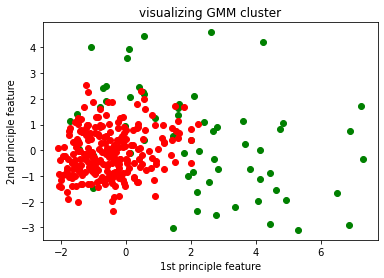

In [185]:
# #visualize data
#visualize data 2-D

import matplotlib.pyplot as plt
filtered_label0 = data[gm_assign == 0]
filtered_label1 = data[gm_assign == 1]
filtered_label2 = data[gm_assign == 2]
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1],color='green')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'blue')
plt.title("visualizing GMM cluster")
plt.xlabel("1st principle feature")
plt.ylabel("2nd principle feature")
plt.show()

Text(0.5, 0, '2nd principle feature')

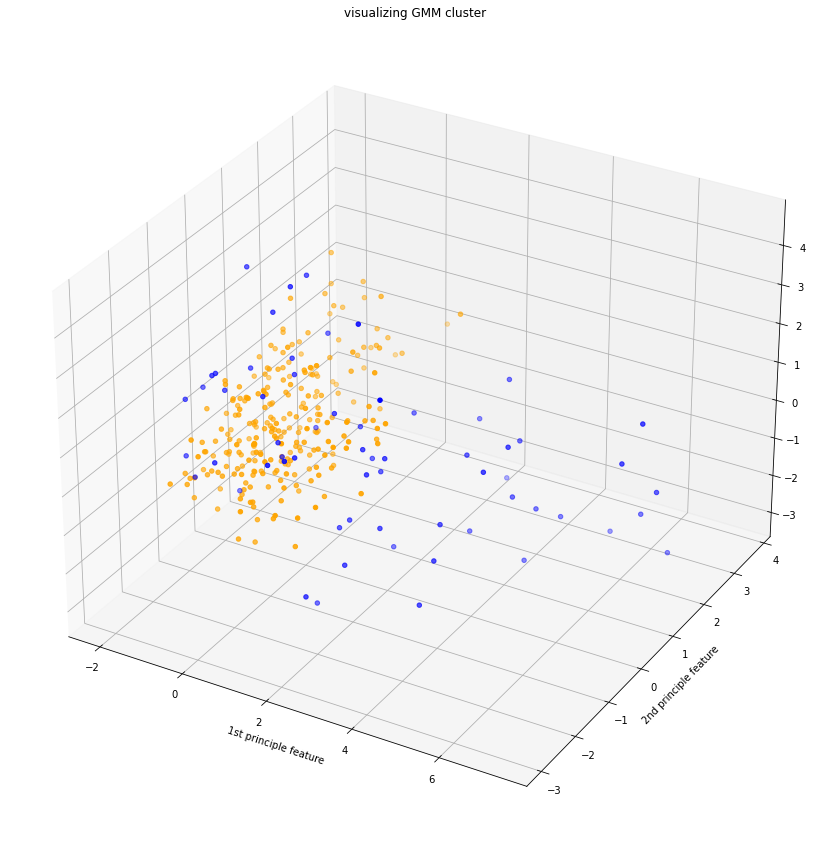

In [144]:
#visualize one data 2
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

filtered_label0 = data[gm_assign == 0]
filtered_label1 = data[gm_assign == 1]
filtered_label2 = data[gm_assign == 2]

ax.scatter(filtered_label0[:,0] , filtered_label0[:,2] , filtered_label0[:,1],color = 'blue', label = "cluster 0")
ax.scatter(filtered_label1[:,0] , filtered_label1[:,2] , filtered_label1[:,1], color = 'orange', label = "cluster 1")
ax.scatter(filtered_label2[:,0] , filtered_label2[:,2], filtered_label2[:,1], color = 'green', label = "cluster 2")
plt.title("visualizing GMM cluster")
plt.xlabel("1st principle feature")
plt.ylabel("2nd principle feature")
plt.ylabel("2nd principle feature")

Text(0, 0.5, '4th Neares Neighbor Distance')

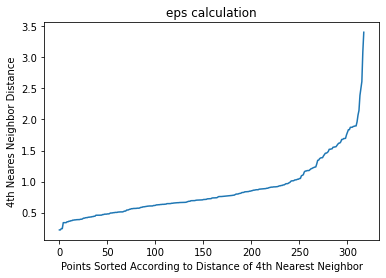

In [145]:
#DBSCAN - get eps
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('eps calculation')
plt.xlabel("Points Sorted According to Distance of 4th Nearest Neighbor")
plt.ylabel("4th Neares Neighbor Distance")

In [146]:
#DBSCAN - result is 10 clusters
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=4).fit(data)
#df["DBSCAN"]=clustering.labels_

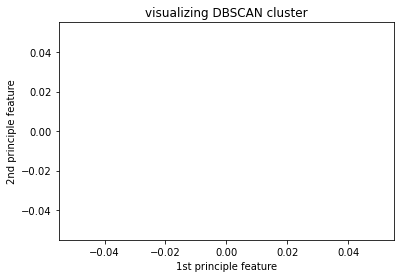

In [147]:
#visualize data
import matplotlib.pyplot as plt
filtered_label0 = data[clustering.labels_ == 0]
filtered_label1 = data[clustering.labels_ == 1]
filtered_label2 = data[clustering.labels_== 2]
filtered_label3 = data[clustering.labels_ == 3]
filtered_label4 = data[clustering.labels_ == 4]
filtered_label5 = data[clustering.labels_ == 5]
filtered_label6 = data[clustering.labels_ == 6]
filtered_label7 = data[clustering.labels_ == 7]
filtered_label8 = data[clustering.labels_ == 8]
filtered_label9 = data[clustering.labels_ == 9]
filtered_label10 = data[clustering.labels_== 10]
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1],color='green')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'blue')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1],color='orange')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'purple')
plt.scatter(filtered_label5[:,0] , filtered_label5[:,1] , color = 'brown')
plt.scatter(filtered_label6[:,0] , filtered_label6[:,1],color='pink')
plt.scatter(filtered_label7[:,0] , filtered_label7[:,1] , color = 'gray')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'olive')
plt.scatter(filtered_label9[:,0] , filtered_label9[:,1] , color = 'cyan')
plt.scatter(filtered_label10[:,0] , filtered_label10[:,1] , color = 'yellow')
plt.title("visualizing DBSCAN cluster")
plt.xlabel("1st principle feature")
plt.ylabel("2nd principle feature")
plt.show()

In [148]:
# from mpl_toolkits import mplot3d

# fig = plt.figure(figsize = (15,15))
# ax = fig.add_subplot(111, projection='3d')

# filtered_label0 = data[clustering.labels_ == 0]
# filtered_label1 = data[clustering.labels_ == 1]
# filtered_label2 = data[clustering.labels_ == 2]
# filtered_label3 = data[clustering.labels_ == 3]
# filtered_label4 = data[clustering.labels_ == 4]
# filtered_label5 = data[clustering.labels_ == 5]
# filtered_label6 = data[clustering.labels_ == 6]
# filtered_label7 = data[clustering.labels_ == 7]
# filtered_label8 = data[clustering.labels_ == 8]
# filtered_label9 = data[clustering.labels_ == 9]
# filtered_label10 = data[clustering.labels_== 10]

# ax.scatter(filtered_label0[:,2] , filtered_label0[:,1] , filtered_label0[:,0],color='green', label = "cluster 0")
# ax.scatter(filtered_label1[:,2] , filtered_label1[:,1] , filtered_label1[:,0], color = 'red', label = "cluster 1")
# ax.scatter(filtered_label2[:,2] , filtered_label2[:,1], filtered_label2[:,0], color = 'blue', label = "cluster 2")
# ax.scatter(filtered_label3[:,2] , filtered_label3[:,1] , filtered_label3[:,0], color='orange', label = "cluster 3")
# ax.scatter(filtered_label4[:,2] , filtered_label4[:,1], filtered_label4[:,0], color = 'purple', label = "cluster 4")
# ax.scatter(filtered_label5[:,2] , filtered_label5[:,1] , filtered_label5[:,0],color = 'brown', label = "cluster 5")
# ax.scatter(filtered_label6[:,2] , filtered_label6[:,1] , filtered_label6[:,0], color='pink', label = "cluster 6")
# ax.scatter(filtered_label7[:,2] , filtered_label7[:,1], filtered_label7[:,0], color = 'olive', label = "cluster 7")
# ax.scatter(filtered_label8[:,2] , filtered_label8[:,1] , filtered_label8[:,0], color = 'gray', label = "cluster 8")
# ax.scatter(filtered_label9[:,2] , filtered_label9[:,1], filtered_label9[:,0], color = 'black', label = "cluster 9")
# ax.scatter(filtered_label10[:,2] , filtered_label10[:,1], filtered_label10[:,0], color = 'yellow', label = "cluster 10")

# plt.title("visualizing DBSCAN cluster")
# plt.xlabel("1st principle feature")
# plt.ylabel("2nd principle feature")
# plt.ylabel("2nd principle feature")

In [149]:
#print to csv
print(df)
df.to_csv('output.csv', index=False)

     Viral  Unnamed: 0  danceability    energy  loudness  acousticness  \
0      1.0          64      0.563831  0.598941  0.824815      0.371849   
1      1.0          55      0.728960  0.819829  0.880386      0.057573   
2      0.0         119      0.749459  0.434039  0.765382      0.664316   
3      1.0         103      0.715294  0.605049  0.838259      0.219083   
4      0.0         160      0.403257  0.443200  0.760322      0.121594   
..     ...         ...           ...       ...       ...           ...   
313    0.0         125      0.600273  0.109324  0.599180      0.968844   
314    1.0         194      0.612800  0.608103  0.801850      0.103504   
315    1.0         119      0.790457  0.706840  0.857541      0.037271   
316    1.0          47      0.313290  0.612174  0.819695      0.233154   
317    1.0         174      0.861064  0.592834  0.823947      0.691452   

     instrumentalness  liveness   valence     tempo  duration_ms  \
0            0.000051  0.108362  0.139968  

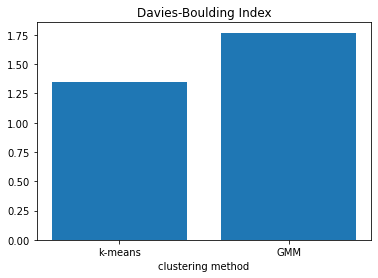

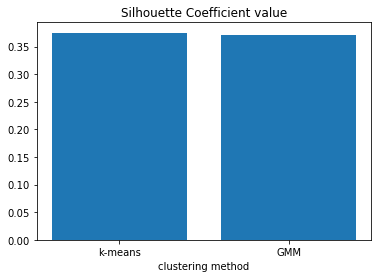

In [189]:
#DB index
from sklearn.metrics import davies_bouldin_score
db_index=[]
db_index.append(davies_bouldin_score(data, kmeans))
db_index.append(davies_bouldin_score(data, gm_assign))
plt.bar(["k-means","GMM"], db_index)
plt.title('Davies-Boulding Index')
plt.xlabel("clustering method")
plt.show()
#silhouette coefficient
from sklearn.metrics import silhouette_score
sc=[]
sc.append(silhouette_score(data, kmeans))
sc.append(silhouette_score(data, gm_assign))
plt.bar(["k-means","GMM"], sc)
plt.title('Silhouette Coefficient value')
plt.xlabel("clustering method")
plt.show()

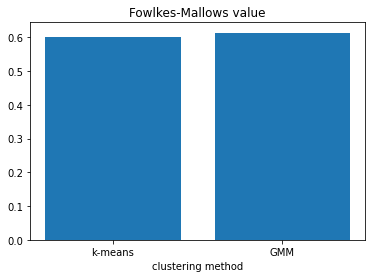

In [190]:
#FM measure
from sklearn.metrics.cluster import fowlkes_mallows_score
fm=[]
fm.append(fowlkes_mallows_score(label,kmeans))
fm.append(fowlkes_mallows_score(label,gm_assign))
plt.bar(["k-means","GMM"], fm)
plt.title('Fowlkes-Mallows value')
plt.xlabel("clustering method")
plt.show()

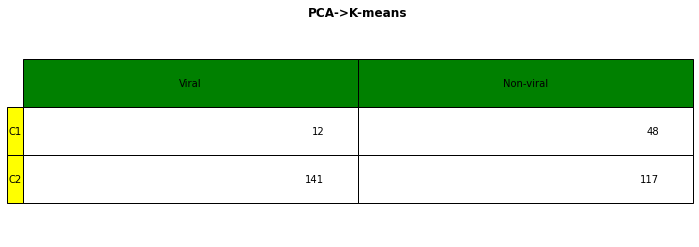

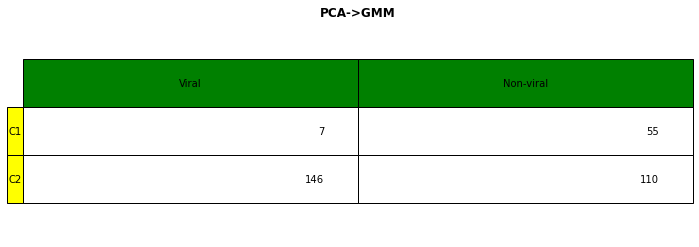

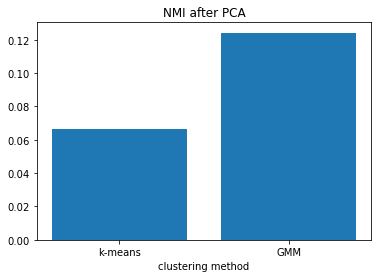

In [192]:
#Entropy-based measures

#cluster/partition table
k11=0 #cluster 0 partition viral
k12=0 #cluster 1 partition viral
k13=0 #cluster 0 partition non-viral
k14=0 #cluster 1 partition non-viral


g11=0 #cluster 0 partition viral
g12=0 #cluster 1 partition viral
g13=0 #cluster 0 partition non-viral
g14=0 #cluster 1 partition non-viral
for i in range(0,data.shape[0]):
    if label[i]==1:
        if kmeans[i]==0:
            k11+=1
        if gm_assign[i]==0:
            g11+=1
        if kmeans[i]==1:
            k12+=1
        if gm_assign[i]==1:
            g12+=1
    else:
        if kmeans[i]==0:
            k13+=1
        if gm_assign[i]==0:
            g13+=1
        if kmeans[i]==1:
            k14+=1
        if gm_assign[i]==1:
            g14+=1

# hide axes
fig, ax =plt.subplots(1,1)
data2=[[k11,k13],
      [k12,k14]]
column_labels=["Viral", "Non-viral"]
ax.axis('tight')
ax.axis('off')
df=pd.DataFrame(data2,columns=column_labels)
the_table=ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["C1","C2"],rowColours =["yellow"] * 2,  
        colColours =["green"] * 2,loc="center")
fontsize = 10
the_table.set_fontsize(fontsize)
the_table.scale(2, 4)
ax.set_title('PCA->K-means', fontweight ="bold") 
plt.show()


# hide axes
fig, ax = plt.subplots(1,1) 
data3=[[g11,g13],
      [g12,g14]]
column_labels=["Viral", "Non-viral"]
ax.axis('tight')
ax.axis('off')
df=pd.DataFrame(data3,columns=column_labels)
the_table=ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["C1","C2"],rowColours =["yellow"] * 2,  
        colColours =["green"] * 2,loc="center")
fontsize = 10
the_table.set_fontsize(fontsize)
the_table.scale(2, 4)
ax.set_title('PCA->GMM', fontweight ="bold") 
plt.show()


from sklearn.metrics.cluster import normalized_mutual_info_score
nmi=[]
nmi.append(normalized_mutual_info_score(label,kmeans))
nmi.append(normalized_mutual_info_score(label,gm_assign))
#nmi.append(normalized_mutual_info_score(label,clustering.labels_))
plt.bar(["k-means","GMM"], nmi)
plt.title('NMI after PCA')
plt.xlabel("clustering method")
plt.show()
